#### Algorithm 3: removal of redundant hyperedges keeping the same fibre partition of the nodes.

In this notebook we will start from a small known hypergraph to visualize it and we will apply Algorithm 3 to obtain a new hypergraph with less hypereges. 

We will test again the partition in fibres of the new hypergraph to test if it is preserved.

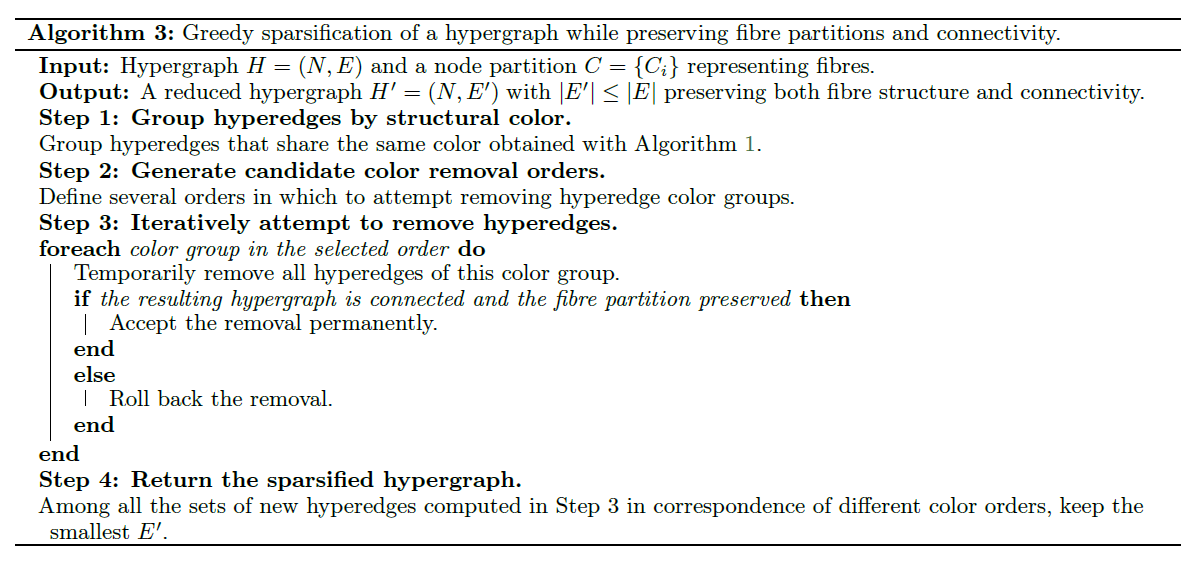

In [1]:
# Libraries

import sys
sys.path.insert(0, '../Utilities')

import networkx as nx

import hypergraphx as hx
from hypergraphx.core.hypergraph import Hypergraph
from hypergraphx.generation.random import random_hypergraph
from hypergraphx.viz import draw_hypergraph

from utilities_fibration import *
from draw_hypergraph_col import *
from hypg_modifications_utilities import *

In [2]:
# Small hypergraph with known structure

edge_list_sc = [[0,1],[1,2],[2,3],[0,2],[3,4],[4,5],[3,5],[6,7],[6,8],[0,1,2],[3,4,5],[6,7,8],[1,6]]

# Random hypergraph
## N = 200 
## hpg = random_hypergraph(N, {2: 120, 3: 80})
## sub_hpg = hpg.subhypergraph_largest_component()
## edge_list_sc_filtered_holes = [list(x) for x in sub_hpg.get_edges()]
## edge_list_sc = normalize_sequence(edge_list_sc_filtered_holes)[0]


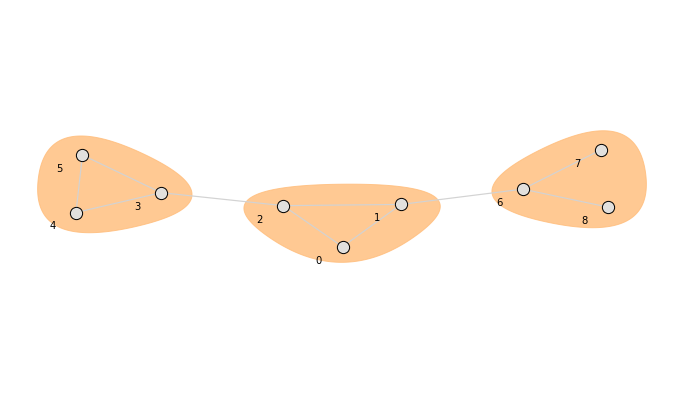

In [3]:
# Create hypergraph and draw it

H =  edge_list_sc

hg = Hypergraph(H)

draw_hypergraph(hg, with_node_labels=True)

In [4]:
# Hypergraph coloring in one step
result_hg_tot = hypergraph_coloring_list([H])

In [5]:
# Extract dictionaries and node clusters as list of lists

edge_name_dict = result_hg_tot[0][2]
edge_col_dict = result_hg_tot[0][1]

node_cluster_hg = {k: v for k, v in result_hg_tot[0][1].items() if k.startswith('N')}
cl_hg = []
# Consider the node partition for the hypergraph
for val in set(node_cluster_hg.values()):
    cl_hg.append([k for k, v in node_cluster_hg.items() if v == val])

dic = {v: edge_col_dict[k] for k, v in edge_name_dict.items()}

list_c = cl_hg

# Transform the list of the node cluster substituting with the original names
clusters = [[edge_name_dict[item] for item in sublist] for sublist in list_c]    
clusters   

[[1], [4, 5], [0], [7, 8], [6], [3], [2]]

In [6]:
hyperedges, color_dict, node_map = result_hg_tot[0]

In [7]:
# Fix a set of hyperedges that cannot be removed
l = [[0,1],[1,2],[2,3],[0,2],[3,4],[4,5],[3,5],[0,1,2],[3,4,5],[6,7,8],[1,6]]
s = set(frozenset(h) for h in l)
s

{frozenset({3, 4}),
 frozenset({2, 3}),
 frozenset({1, 2}),
 frozenset({0, 1, 2}),
 frozenset({4, 5}),
 frozenset({0, 1}),
 frozenset({0, 2}),
 frozenset({6, 7, 8}),
 frozenset({3, 5}),
 frozenset({3, 4, 5}),
 frozenset({1, 6})}

In [8]:
pruned_hyperedges, pruned_color_dict, pruned_node_map, pruned_clusters = optimize_color_removal(
    hyperedges, color_dict, node_map, clusters, 10 ,True, s)

Removed hyperedges of original color 8. Hypergraph is still connected.
Clusters are consistent after removing color 8.
len: 11
Tried 1 permutations.

*************************
Removed hyperedges of original color 8. Hypergraph is still connected.
Clusters are consistent after removing color 8.
len: 11
Tried 2 permutations.

*************************
Removed hyperedges of original color 8. Hypergraph is still connected.
Clusters are consistent after removing color 8.
len: 11
Tried 3 permutations.

*************************
Removed hyperedges of original color 8. Hypergraph is still connected.
Clusters are consistent after removing color 8.
len: 11
Tried 4 permutations.

*************************
Removed hyperedges of original color 8. Hypergraph is still connected.
Clusters are consistent after removing color 8.
len: 11
Tried 5 permutations.

*************************
Removed hyperedges of original color 8. Hypergraph is still connected.
Clusters are consistent after removing color 8.
l

In [9]:
print(f'New length: {len(pruned_hyperedges)}')
print(f'Original length: {len(hyperedges)}')

New length: 11
Original length: 13


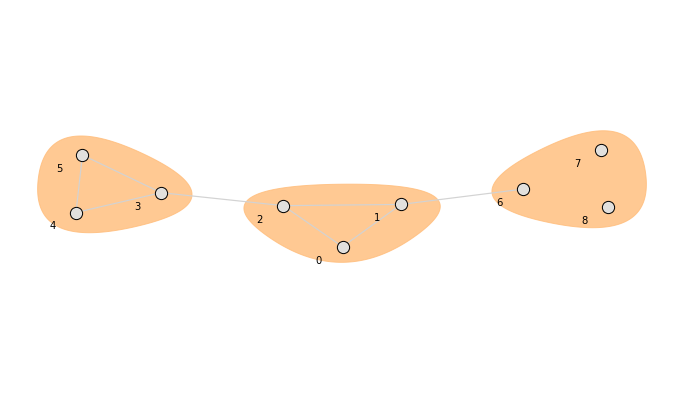

In [10]:
# Visualize the new hypergraph

hg = Hypergraph(pruned_hyperedges)

draw_hypergraph(hg, with_node_labels=True)

In [11]:
# Compare the clusters before and after pruning

result_hg_tot_p = hypergraph_coloring_list([pruned_hyperedges])
edge_name_dict_p = result_hg_tot_p[0][2]
edge_col_dict_p = result_hg_tot_p[0][1]

node_cluster_hg_p = {k: v for k, v in result_hg_tot_p[0][1].items() if k.startswith('N')}
cl_hg_p = []
for val in set(node_cluster_hg_p.values()):
    cl_hg_p.append([k for k, v in node_cluster_hg_p.items() if v == val])

dic_p = {v: edge_col_dict_p[k] for k, v in edge_name_dict_p.items()}
list_c_p = cl_hg_p
clusters_pruned = [[edge_name_dict_p[item] for item in sublist] for sublist in list_c_p]

set_pruned = set(frozenset(inner) for inner in clusters_pruned)
set_original = set(frozenset(inner) for inner in clusters)

print(clusters_pruned)
print(clusters)

set_pruned == set_original

[[2], [4, 5], [3], [0], [1], [7, 8], [6]]
[[1], [4, 5], [0], [7, 8], [6], [3], [2]]


True